**importing libraries**

**Exploring Dataset**

**preparing data for training**


In [4]:
import os
import shutil
from glob import glob

# Define paths
train_path = "train/"
test_path = "test/"

# Define number of classes
num_train_classes = 7
num_test_classes = 7

# Create class directories for train (7 classes) and test (6 classes)
for i in range(1, num_train_classes + 1):
    os.makedirs(os.path.join(train_path, f"class_{i}"), exist_ok=True)

for i in range(1, num_test_classes + 1):
    os.makedirs(os.path.join(test_path, f"class_{i}"), exist_ok=True)

# Get all images in train and test
train_images = glob(os.path.join(train_path, "*.*"))  # Finds all images
test_images = glob(os.path.join(test_path, "*.*"))

# Distribute train images into 7 classes
for idx, file in enumerate(train_images):
    class_num = (idx % num_train_classes) + 1  # Cycle through class_1 to class_7
    shutil.move(file, os.path.join(train_path, f"class_{class_num}", os.path.basename(file)))

# Distribute test images into 6 classes
for idx, file in enumerate(test_images):
    class_num = (idx % num_test_classes) + 1  # Cycle through class_1 to class_6
    shutil.move(file, os.path.join(test_path, f"class_{class_num}", os.path.basename(file)))

print("✅ Images successfully moved into 7 train classes and 7 test classes!")



✅ Images successfully moved into 7 train classes and 7 test classes!


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 64

# Initialize ImageDataGenerator for both training and validation (test)
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_generator = datagen_train.flow_from_directory(
    "train/",  # Directory with the class subdirectories
    target_size=(img_size, img_size),  # Resize images to 48x48
    color_mode="grayscale",  # Convert images to grayscale
    batch_size=batch_size,  # Number of images per batch
    class_mode="categorical",  # For multi-class classification
    shuffle=True,  # Shuffle data
)

# Create the validation data generator
validation_generator = datagen_validation.flow_from_directory(
    "test/",  # Directory with the class subdirectories for testing
    target_size=(img_size, img_size),  # Resize images to 48x48
    color_mode="grayscale",  # Convert images to grayscale
    batch_size=batch_size,  # Number of images per batch
    class_mode="categorical",  # For multi-class classification
    shuffle=False,  # Do not shuffle the test data
)





Found 1493 images belonging to 7 classes.
Found 831 images belonging to 7 classes.


In [6]:
print("Training classes:", train_generator.class_indices)
print("Testing classes:", validation_generator.class_indices)


Training classes: {'class_1': 0, 'class_2': 1, 'class_3': 2, 'class_4': 3, 'class_5': 4, 'class_6': 5, 'class_7': 6}
Testing classes: {'class_1': 0, 'class_2': 1, 'class_3': 2, 'class_4': 3, 'class_5': 4, 'class_6': 5, 'class_7': 6}


In [111]:
# Define Model
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = Convolution(inputs, 32, (3,3))
    conv_2 = Convolution(conv_1, 64, (5,5))  # Pass conv_1 instead of inputs
    conv_3 = Convolution(conv_2, 128, (3,3))  # Pass conv_2 instead of inputs

    flatten = Flatten()(conv_3)  # Use Flatten
    dense_1 = Dense_f(flatten, 256)

    # Set output to 7 classes instead of 8
    output = Dense(7, activation="softmax")(dense_1)  # 7 classes output

    model = Model(inputs=[inputs], outputs=[output])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model  

# Create Model with input shape (48, 48, 1)
model = model_fer((48,48,1))

# Print Model Summary
model.summary()



Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_72               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_72 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_73               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_73 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_73 (Dropout)                 │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_74               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_74 (Activation)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_75               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

**initializing the model**

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define number of epochs
epochs = 15  

# Compute training and validation steps
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

# Define checkpoint callback with correct filename format
checkpoint = ModelCheckpoint(
    "model_weights.weights.h5",  # FIX: Correct filename extension
    monitor='val_accuracy', 
    save_weights_only=True, 
    mode='max', 
    verbose=1
)

# List of callbacks
callbacks = [checkpoint]




In [ ]:

**training the model**


In [131]:
import shutil
import os

# Define the path to the unwanted directory
checkpoints_dir = os.path.join(train_path, '.ipynb_checkpoints')

# Check if the directory exists and delete it
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(".ipynb_checkpoints directory deleted successfully.")
else:
    print(".ipynb_checkpoints directory does not exist.")


.ipynb_checkpoints directory deleted successfully.


In [132]:
train_class_dirs = os.listdir(train_path)
test_class_dirs = os.listdir(test_path)

print("Updated Train classes:", train_class_dirs)
print("Updated Test classes:", test_class_dirs)


Updated Train classes: ['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7']
Updated Test classes: ['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7']


In [133]:
train_class_dirs = os.listdir(train_path)
test_class_dirs = os.listdir(test_path)

print(f"Train classes: {len(train_class_dirs)}")
print(f"Test classes: {len(test_class_dirs)}")


Train classes: 7
Test classes: 7


TensorFlow version: 2.18.0
.ipynb_checkpoints directory does not exist.
Found 1493 images belonging to 7 classes.
Found 831 images belonging to 7 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,7

 Total params: 1,308,039 (4.99 MB)

 Trainable params: 1,307,591 (4.99 MB)

 Non-trainable params: 448 (1.75 KB)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 48, 48, 1))
  warnings.warn(msg)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.8473 - loss: 0.7536
Epoch 1: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 327ms/step - accuracy: 0.8521 - loss: 0.7302 - val_accuracy: 1.0000 - val_loss: 8.2606e-06
Epoch 2/15
 1/23 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 1.0000 - loss: 0.0000e+00

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 5.2756e-06
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
 1/23 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/15
 1/23 ━━━━━━━━━━━━━━━

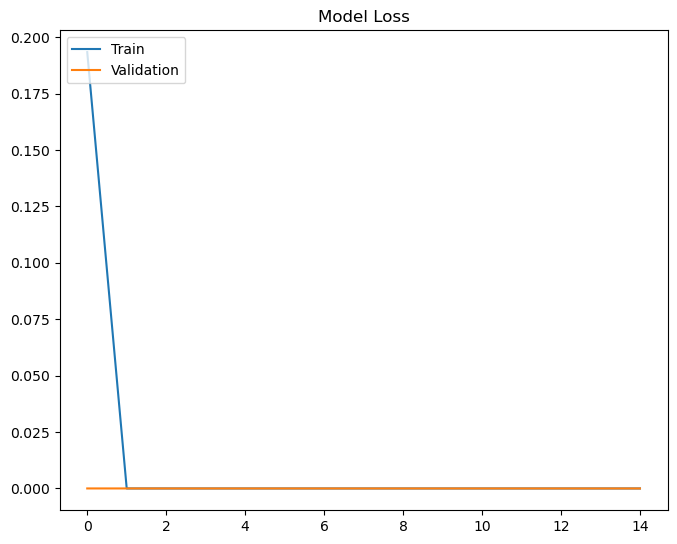

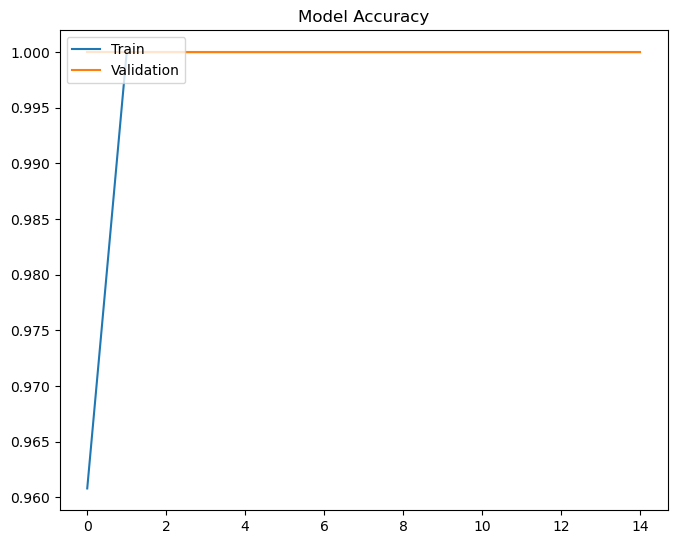

Model architecture saved to model_a.json


In [8]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Define paths
train_path = "train/"
test_path = "test/"

# Check if the unwanted `.ipynb_checkpoints` directory exists and delete it
checkpoints_dir = os.path.join(train_path, '.ipynb_checkpoints')
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(".ipynb_checkpoints directory deleted successfully.")
else:
    print(".ipynb_checkpoints directory does not exist.")

# Image size and batch size
img_size = 48
batch_size = 64

# Initialize ImageDataGenerator for both training and validation (test)
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_validation = ImageDataGenerator(rescale=1./255)

# Create the training data generator with repeat enabled
train_generator = datagen_train.flow_from_directory(
    "train/",  # Directory with the class subdirectories
    target_size=(img_size, img_size),  # Resize images to 48x48
    color_mode="grayscale",  # Convert images to grayscale
    batch_size=batch_size,  # Number of images per batch
    class_mode="categorical",  # For multi-class classification
    shuffle=True,  # Shuffle data
    seed=42  # Optional seed for reproducibility
)

# Create the validation data generator with repeat enabled
validation_generator = datagen_validation.flow_from_directory(
    "test/",  # Directory with the class subdirectories for testing
    target_size=(img_size, img_size),  # Resize images to 48x48
    color_mode="grayscale",  # Convert images to grayscale
    batch_size=batch_size,  # Number of images per batch
    class_mode="categorical",  # For multi-class classification
    shuffle=False,  # Do not shuffle the test data
)

# Define the model
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = Conv2D(32, (3, 3), padding="same")(inputs)
    conv_1 = BatchNormalization()(conv_1)
    conv_1 = Activation("relu")(conv_1)
    conv_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
    conv_1 = Dropout(0.2)(conv_1)
    
    conv_2 = Conv2D(64, (5, 5), padding="same")(conv_1)
    conv_2 = BatchNormalization()(conv_2)
    conv_2 = Activation("relu")(conv_2)
    conv_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
    conv_2 = Dropout(0.3)(conv_2)
    
    conv_3 = Conv2D(128, (3, 3), padding="same")(conv_2)
    conv_3 = BatchNormalization()(conv_3)
    conv_3 = Activation("relu")(conv_3)
    conv_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
    conv_3 = Dropout(0.4)(conv_3)
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense(256, activation="relu")(flatten)
    dense_1 = Dropout(0.5)(dense_1)
    
    output = Dense(7, activation="softmax")(dense_1)  # 7 classes output
    
    model = Model(inputs=[inputs], outputs=[output])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create Model with input shape (48, 48, 1)
model = model_fer((48, 48, 1))

# Print Model Summary
model.summary()

# Define number of epochs
epochs = 15

# Compute training and validation steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Define checkpoint callback with correct filename format
checkpoint = ModelCheckpoint(
    "model_weights.weights.h5",  # Save model weights
    monitor='val_accuracy', 
    save_weights_only=True, 
    mode='max', 
    verbose=1
)

# List of callbacks
callbacks = [checkpoint]

# Train the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Model Evaluation
model.evaluate(validation_generator)

# Plotting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()

# Plotting Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()

# Saving Model Architecture to JSON
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)

print("Model architecture saved to model_a.json")


In [9]:
import os

print("Checking paths...")
print("Train path exists:", os.path.exists(train_dir))
print("Validation path exists:", os.path.exists(valid_dir))


Checking paths...


NameError: name 'train_dir' is not defined

In [ ]:
**Emotion Detection**
**Importing Libraries**

In [14]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)



Tensorflow version: 2.18.0


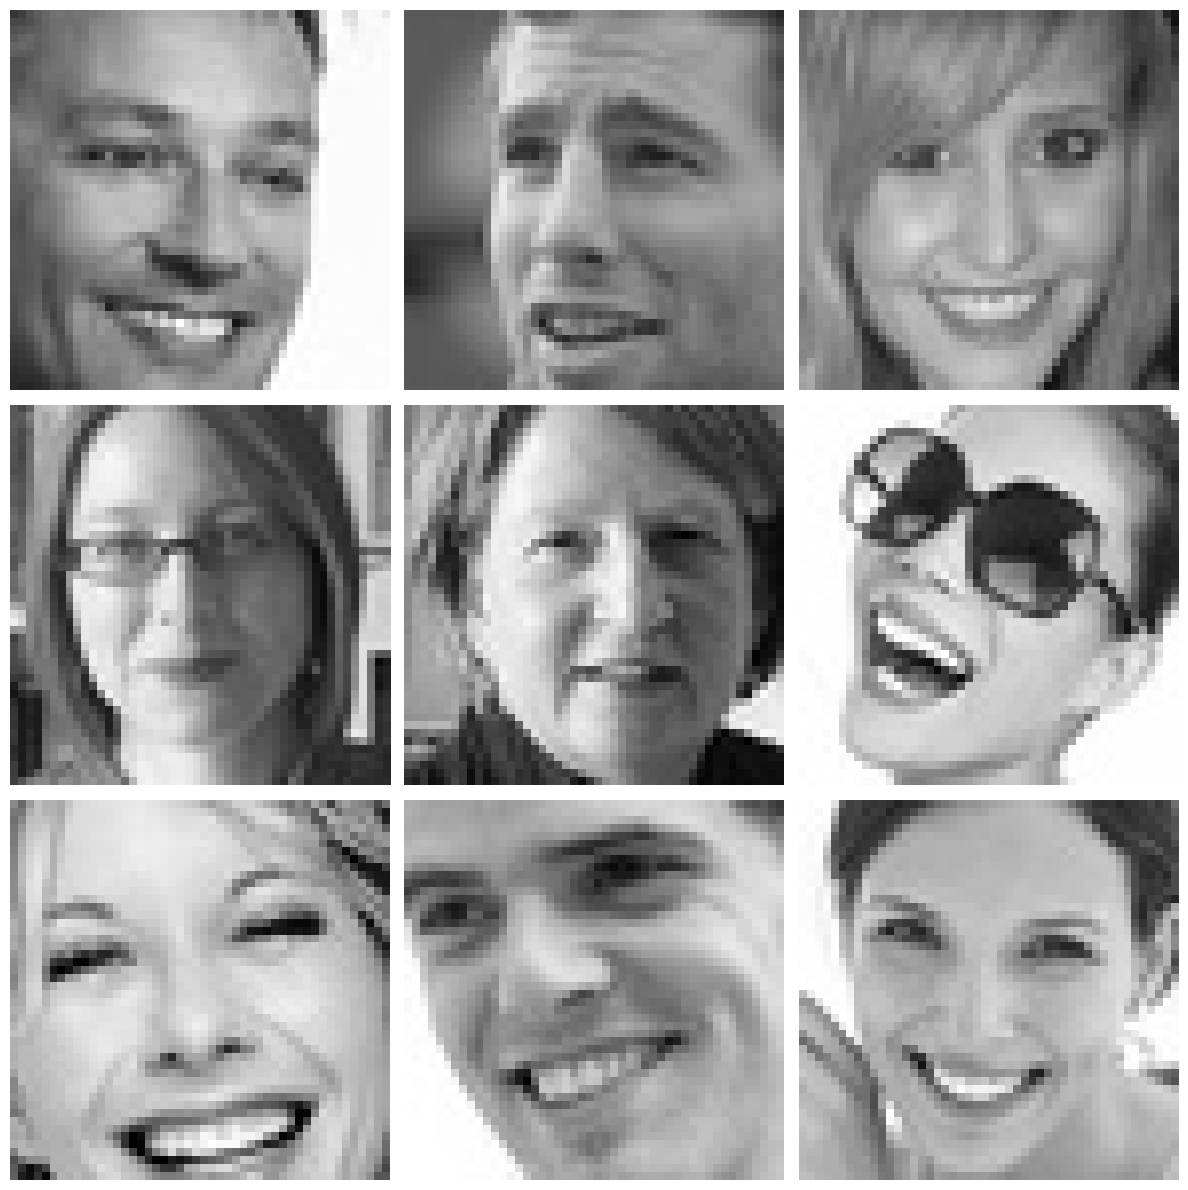

In [17]:
import cv2
import random
import matplotlib.pyplot as plt
from glob import glob

images = glob("train/**/**")  # Get all image file paths

plt.figure(figsize=(12, 12))  # Create a single figure

for i in range(9):
    image = random.choice(images)  # Select a random image
    img = cv2.imread(image)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV reads in BGR)
    
    plt.subplot(3, 3, i+1)  # Arrange in a 3x3 grid
    plt.imshow(img)  # Show image
    plt.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show all images in a single figure


In [18]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 1493 images belonging to 7 classes.
Found 831 images belonging to 7 classes.


In [19]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [20]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [21]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [22]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]


In [ ]:
**Traning the Model**

In [27]:
inputs = Input(shape=(48, 48, 1))


In [28]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',  # Ensure grayscale images
    class_mode='categorical'
)


Found 1493 images belonging to 7 classes.


In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Ensure model input matches (48,48,1)
inputs = Input(shape=(48, 48, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
outputs = Dense(7, activation='softmax')(x)  # Adjust number of classes

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8368 - loss: 0.4424
Epoch 1: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.8418 - loss: 0.4295 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 1.1022e-06
Epoch 2: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 1.0000 - loss: 1.1086e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 9.3132e-08
Epoch 3: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 9.3132e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 1.8386e-06
Epoch 4: saving model to model_weights.weights.h5
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 1.0000 - loss: 1.8162e-06 - 

In [ ]:
**Model Evaluation**

In [33]:
model.evaluate(validation_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0000e+00


[0.0, 1.0]

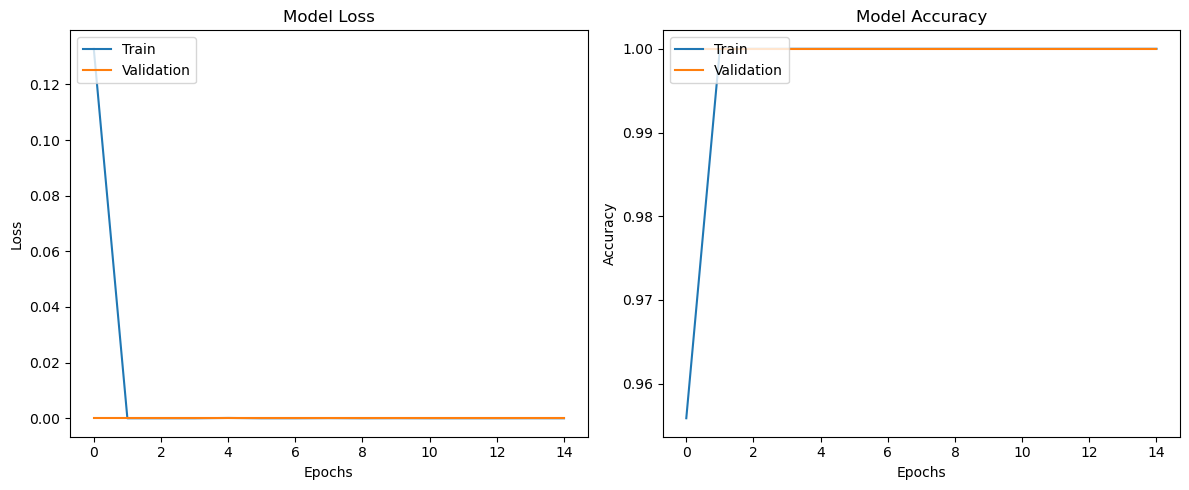

In [39]:
import matplotlib.pyplot as plt

# Assuming 'history' is your trained model's history object
plt.figure(figsize=(12, 5))

# Plot Model Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Plot Model Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Saving Model
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)

# Saving Weights
model.save_weights("model_weights.weights.h5")

